# Morphological Operators

Sets of Kernels that can achieve a variety of effects like reducing noise

In [13]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline


def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

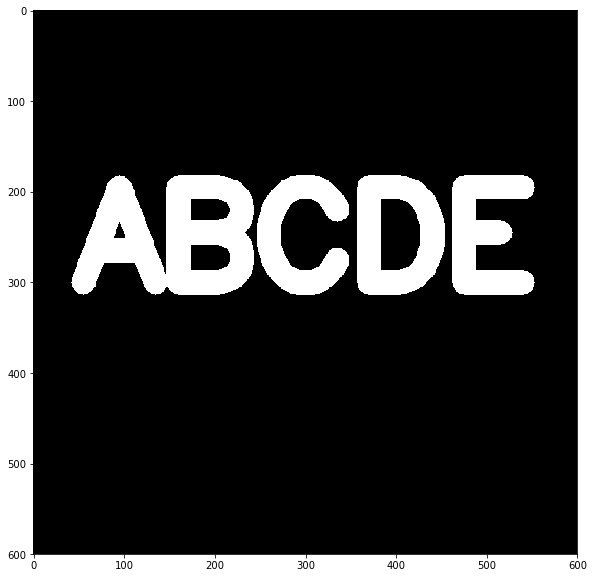

In [14]:
img = load_img()
display_img(img)

## Erosion

Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

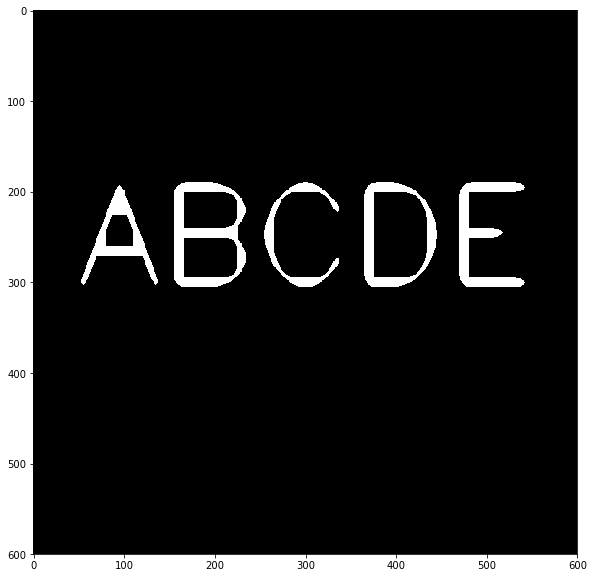

In [19]:
kernel = np.ones((5,5), dtype=np.uint8)
result = cv2.erode(img,kernel,iterations=4)
display_img(result)

## Opening
Opening is erosion followed by dilation. Useful in removing background noise!

In [25]:
img = load_img()
print(img.max())
white_noise = np.random.randint(low=0,high=2,size=(600,600))
white_noise

255.0


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

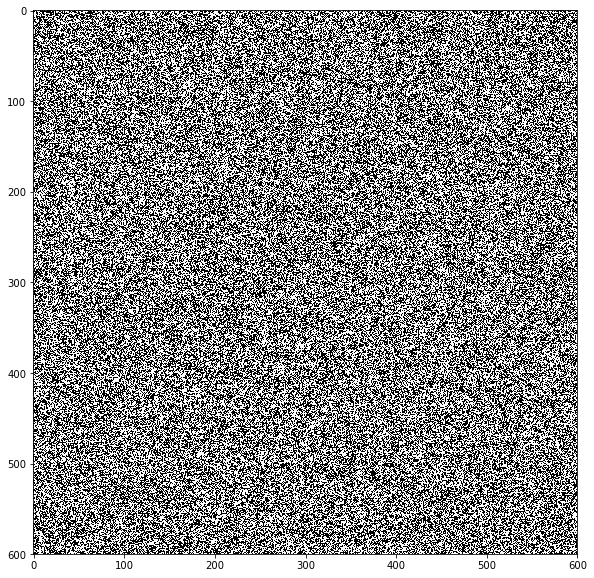

In [26]:
# convert 1's to 255
white_noise = white_noise*255
display_img(white_noise)

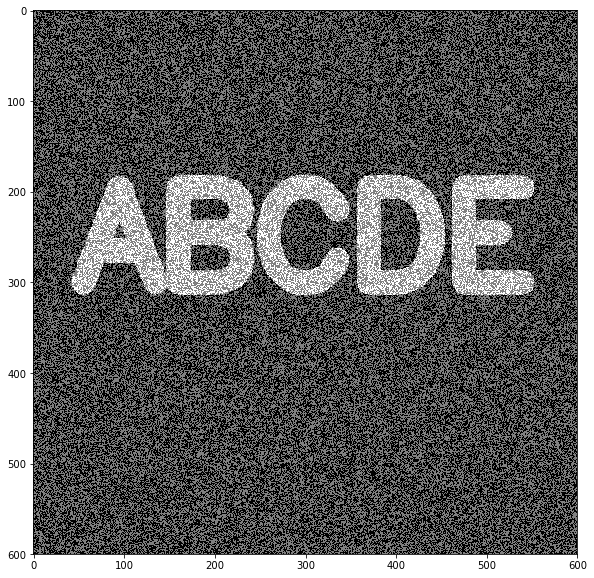

In [29]:
noise_img = white_noise + img # adding noise
display_img(noise_img)

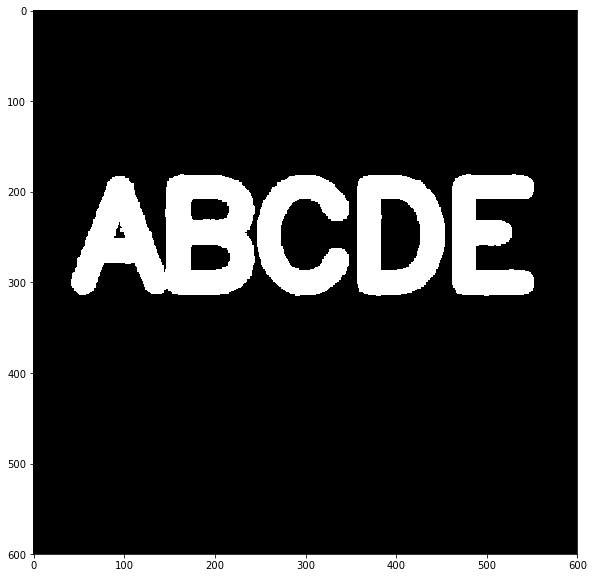

In [33]:
# removing noise
# opening is erosion followed by dilation
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)
display_img(opening)

## Closing
 Useful in removing noise from foreground objects, such as black dots on top of the white text.

In [41]:
# subtracting 255 from all pixels
img = load_img()
black_noise = np.random.randint(low=0,high=2,size=(600,600))
black_noise = black_noise * -255
black_noise

array([[   0, -255,    0, ..., -255, -255,    0],
       [   0,    0,    0, ..., -255,    0, -255],
       [   0, -255, -255, ..., -255, -255,    0],
       ...,
       [   0, -255,    0, ...,    0,    0, -255],
       [-255,    0,    0, ..., -255,    0, -255],
       [-255,    0,    0, ...,    0,    0,    0]])

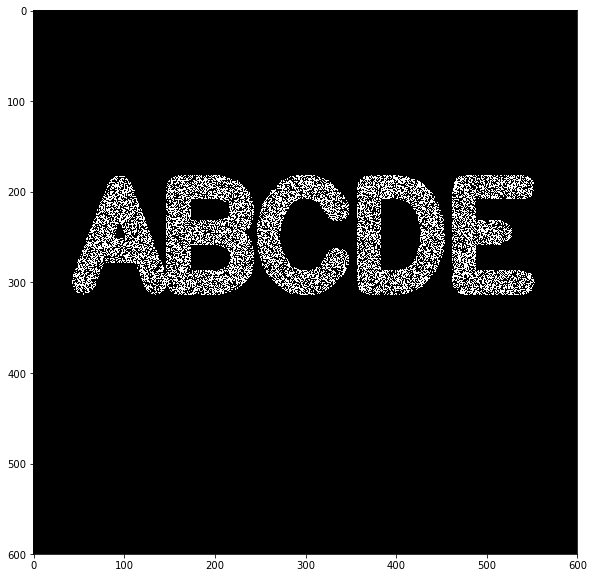

In [43]:
black_noise_img = img + black_noise
black_noise_img[black_noise_img == -255] = 0
display_img(black_noise_img)

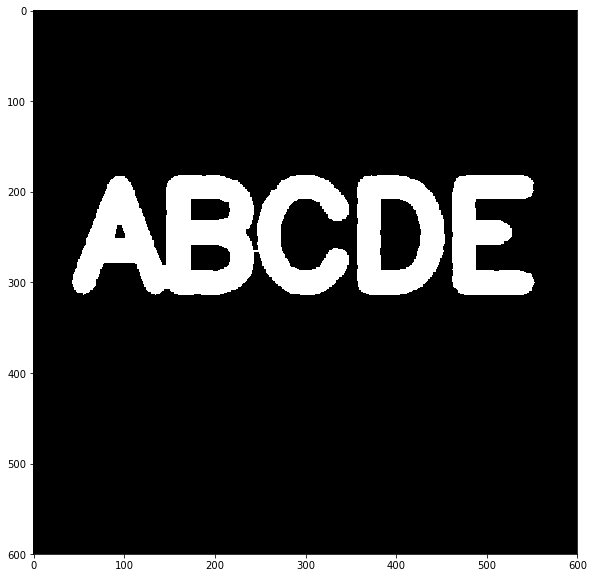

In [46]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)
display_img(closing)

## Morphological Gradient

Difference between dilation and erosion of an image.

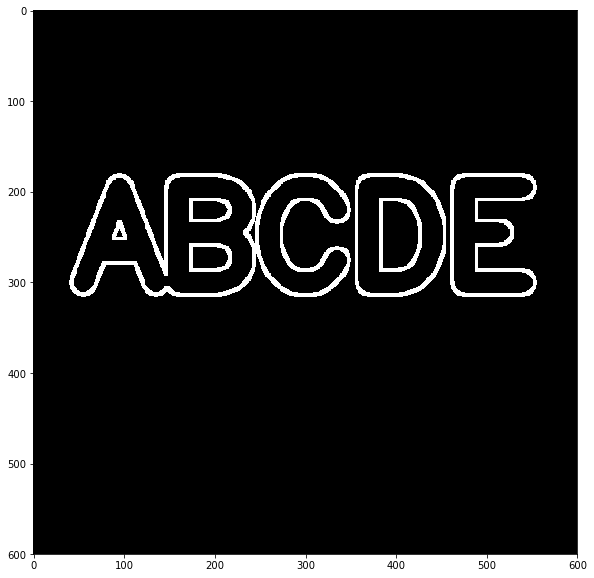

In [49]:
# gradient takes difference between dilation and erosion
img = load_img()
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)